  **1.- Query en SQL**

---

$1$. *Definiendo querries y SQL*

Un *query* es lo que un usuario de una motor de búsqueda o de una base de datos entrega, o da como input, para obtener datos de ese motor o base de datos. Lenguajes usados para manipular, almacenar, interactuar y recuperar datos de bases de datos, mediantes *querries* son llamados *query languages*. El más utilizado es Structured Query Language (SQL), que es un lenguaje de usado por los querries para hacer pedidos de datos.

$2$. *Análisis de un query*

**SELECT gaia.source_id, gaia.hip, gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 as g_mag_abs_gaia, gaia.phot_g_mean_mag+5*log10(hip.plx)-10 as g_mag_abs_hip, hip."B-V"**

Aquí se está pidiendo las columnas que se quieren extrar indicando las tablas o catálogos de las cuales se extraen. También se le asignan nombre de variables mas cortos por ejemplo: *catalogo.columna as catcol*.

**FROM "I/337/tgas" AS gaia**

Se indica el filtro y el catálogo del cual se van a sacar los datos o tablas. También se le asigna un nombre de variable corto.

**INNER JOIN "I/311/hip2" as hip**

Selecciona las columnas coincidentes entre una tabla y otra

**ON gaia.hip = hip.HIP**

Se hace una union entre los elementos coincidentes de un catálogo y otro.

**WHERE gaia.parallax/gaia.parallax_error >= 5 AND hip.Plx/hip.e_Plx >= 5 AND hip."e_B-V" > 0.0 and hip."e_B-V" <= 0.05 AND (2.5/log(10))*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05**

Aquí se dan muchas condiciones a las columnas o datos que se quieren pedir, para seleccionar los datos que se quieren. La señal a ruido de paralaje de gaia e hip tiene que ser mayor o igual a 5. El error de $B-V$ debe ser mayor que 0 y mayor que 0.05.

$3$ *Ejecución del query*

Utilizamos la función *act4* para ejecutar el query y obtener los valores pedidos.

In [1]:
import act4 as act4

Data = act4.query_TAP("http://tapvizier.u-strasbg.fr/TAPVizieR/tap","""SELECT gaia.source_id, gaia.hip,
gaia.phot_g_mean_mag+5*log10(gaia.parallax)-10 as g_mag_abs_gaia,
gaia.phot_g_mean_mag+5*log10(hip.plx)-10 as g_mag_abs_hip,hip."B-V"
FROM "I/337/tgas" AS gaia
INNER JOIN "I/311/hip2" as hip
ON gaia.hip = hip.HIP
WHERE gaia.parallax/gaia.parallax_error >= 5 AND
hip.Plx/hip.e_Plx >= 5 AND
hip."e_B-V" > 0.0 and hip."e_B-V" <= 0.05 AND
(2.5/log(10))*(gaia.phot_g_mean_flux_error/gaia.phot_g_mean_flux) <= 0.05""")

Data

source_id [1],hip [1],g_mag_abs_gaia [1],g_mag_abs_hip [1],B-V [1]
,,mag,mag,mag
int64,int32,float64,float64,float64
6573602993063998848,109795,2.87160300908,2.45642582017,0.631
6573655460384085888,109508,2.60984667835,2.52287954206,0.646
6573729196383276544,109901,5.38885950082,5.2669742502,0.828
6573753591797024000,110115,5.7858514758,5.3050921695,0.965
6573981087624594816,109455,3.69903268771,3.66261809916,0.464
6574012080108969600,109595,3.09765842266,3.60122397773,0.387
6574081349341199872,109489,4.66990623024,4.46511319184,0.763
6574301973221214848,108950,3.45515927014,3.51061357103,0.718


$4$ *Creando CMD*

Utilizamos la función *plot_scatter_density* de *act4* para generar el CMD.

Populating the interactive namespace from numpy and matplotlib


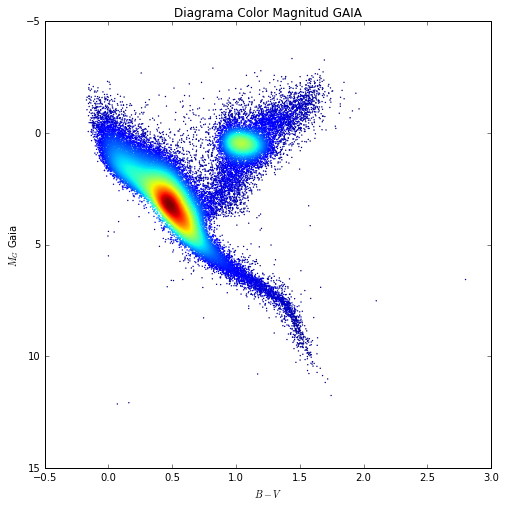

In [2]:
import matplotlib.pyplot as plt
%pylab inline

act4.plot_scatter_density(Data, "B-V", "g_mag_abs_gaia", "$B-V$", "$M_G$ Gaia", "Diagrama Color Magnitud GAIA")

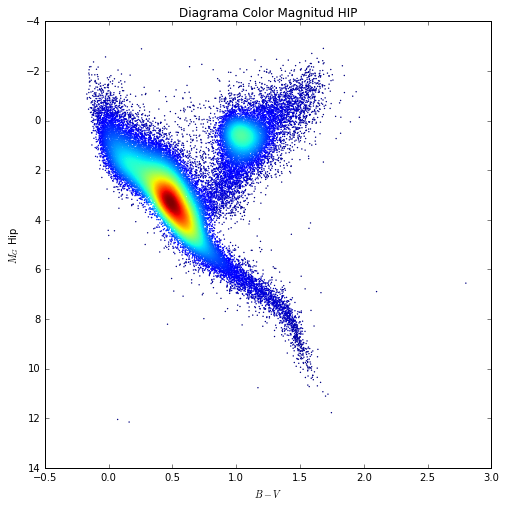

In [3]:
act4.plot_scatter_density(Data, "B-V", "g_mag_abs_hip", "$B-V$", "$M_G$ Hip", "Diagrama Color Magnitud HIP")

Fuentes:
> *http://searchsqlserver.techtarget.com/definition/query*

> *http://www.1keydata.com/es/sql/*

> *http://www.tutorialspoint.com/sql/sql-select-query.htm*

> *https://github.com/andres-jordan/experimental*

  **2.- Queries en SDSS**

---

$1$. *Sloan Digital Sky Survey*

El Sloan Digital Sky Survey (SDSS) es el mayor survey de imagenes multibanda y fotométricas. El proyecto tiene por objetivo tomar imágenes de más de 3 millones de objetos astronómicos en el infrarrojo, en el visible y en el ultravioleta para cartografiar un tercio del cielo. El proyecto es de una alta relevancia debido a que de sus datos se va poder conseguir información sobre quásares distantes en los límites del universo observable, la distribución de las galaxias, las propiedades de las estrellas en nuestra propia galaxia y temas como la materia oscura y la energía oscura en el universo.

$2$. *Analizando el query para CAS*

**SELECT G.ra, G.dec, S.mjd, S.plate, S.fiberID, S.z, S.zErr, S.rChi2, S.velDisp, S.velDispErr, G.extinction_r, G.petroMag_r, G.psfMag_r, G.psfMagErr_r, G.modelMag_u, G.modelMagErr_u, G.modelMag_g, G.modelMagErr_g, G.modelMag_r, G.modelMagErr_r, G.modelMag_i, G.modelMagErr_i, G.modelMag_z, G.modelMagErr_z, G.petroR50_r, G.petroR90_r, GSL.nii_6584_flux, GSL.nii_6584_flux_err, GSL.h_alpha_flux, GSL.h_alpha_flux_err, GSL.oiii_5007_flux, GSL.oiii_5007_flux_err, GSL.h_beta_flux, GSL.h_beta_flux_err, GSL.h_delta_flux, GSL.h_delta_flux_err, GSX.d4000, GSX.d4000_err, GSE.bptclass, GSE.lgm_tot_p50, GSE.sfr_tot_p50, G.objID, GSI.specObjID**

El query pide coordenadas, configuracion de las fibras del espectrógrafo, la fibra de cada objeto objeto, el redshift, el error del redshift, la dispersión de las velocidades, el error de la dispersión de velocidades, las magnitudes de las bandas u, g, r, i y z y sus errores, los flujos, los errores de los flujos de NII, $H_\alpha$, OIII, $H_\beta$ y $H_\delta$.

$3$ *Diagrama BPT*

Un diagrama BPT (diagrama Baldwin, Phillips & Terlevich) es un gráfico de dispersion en el cual el eje $x$ generalmente es [NII]λ6583/$H_{\alpha}$, y el eje $y$ es generalmente [OIII]λ5007/$H_{\beta}$. Es usado para distinguir los mecanismos de ionozación de nebulosas de gas, un LINER (región nuclear de lineas de emisión de baja ionización), de una starburst (zonas de gran formación estelar) y un AGN (nucleo activo de galaxia).

Usamos el archivo fits descargado para generar el BPT

In [4]:
from astropy.io import fits

hdulist1 = fits.open('SDSS.fit')
hdulist1.info()
hdulist1[1].header

Filename: SDSS.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    100   661598R x 43C   [1D, 1D, 1J, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1E, 1K, 1K]   


XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  182                                                  
NAXIS2  =               661598                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   43                                                  
TFORM1  = '1D'                                                                  
TTYPE1  = 'ra'                                                                  
TTYPE2  = 'dec'                                                                 
TFORM2  = '1D'                                                                  
TTYPE3  = 'mjd'             

In [5]:
hdulist1.close()

/home/felipe/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/felipe/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


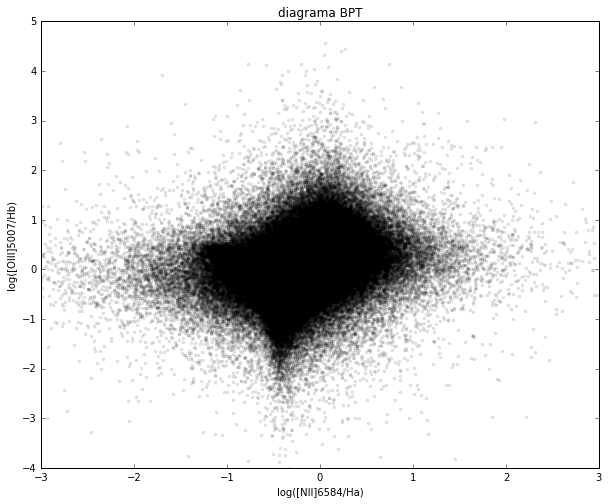

In [12]:
import matplotlib
%matplotlib inline
import fitsio
import numpy as np

SDSS1 = 'SDSS.fit'
SD = fitsio.read(SDSS1)

cond = ((SD['nii_6584_flux']>0) & (SD['oiii_5007_flux']>0) & (SD['h_alpha_flux']>0) & (SD['h_beta_flux']>0))
ejex = SD['nii_6584_flux'][cond]/SD['h_alpha_flux'][cond]
ejey = SD['oiii_5007_flux'][cond]/SD['h_beta_flux'][cond]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(-3,3)
ax.set_ylim(-4,5)
ax.set_title('diagrama BPT')
ax.set_xlabel('log([NII]6584/Ha)')
ax.set_ylabel('log([OIII]5007/Hb)')

mid = len(ejex)/2
ax.plot(np.log10(ejex[0:mid]), np.log10(ejey[0:mid]), '.k', alpha=.1)
ax.plot(np.log10(ejex[mid+1:]), np.log10(ejey[mid+1:]), '.k', alpha=.1)

plt.show()
plt.close()

Fuentes:
> *http://www.sdss.org/*

> *https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey*

> *http://skyserver.sdss.org/casjobs/*